# **데이터 분석 프로젝트: Spotify 음원 차트 분석**

## 목차

1.	서론
2.	데이터 수집, 소개
3.	데이터 전처리, 변환 과정
4.	시각화, 분석, 예측
5.	결론

## 1. 서론


"Spotify 음원 차트 분석"이라는 주제는 빅데이터 처리 과목을 수강하며 활용 가능한 프로젝트를 탐구하던 중 도출된 것입니다. 이 프로젝트는 단순히 수업 과제로만 머물지 않고, 실제 의미 있는 결과를 도출하고자 함을 목표로 삼았습니다. 빅데이터의 다양한 기법을 활용하여 음원 차트 데이터를 분석함으로써 음악 산업의 동향과 아티스트의 인기 요인을 파악하고자 합니다.

## 2. 데이터 수집, 소개

데이터는 "Kaggle"의 ["Top Spotify Songs in 73 Countries"](https://www.kaggle.com/datasets/asaniczka/top-spotify-songs-in-73-countries-daily-updated) CSV 파일로 확보되었습니다. 해당 데이터는 2023년 10월 18일부터 2023년 11월 10일까지 73개 국가의 Spotify 차트에서 상위 50곡의 정보를 담고 있습니다. 음원의 ID, 제목, 아티스트, 랭킹, 랭킹 변동, 인기도, 길이, 앨범 정보 등이 기록되어 있습니다.

## 3. 데이터 전처리, 변환 과정

CSV 형식의 데이터를 "Kaggle"에서 다운로드 받은 후, 구글 Colab을 활용하여 'ISO-8859-1’ 인코딩 방식을 사용하여 업로드하고 'utf-8'로 저장하여 사용했습니다. 전체 73개국의 데이터 중에서 음원 소비에 영향력이 큰 15개국의 데이터를 추출하여 분석과 시각화에 활용했습니다.

In [3]:
import pandas as pd

spotify = pd.read_csv("2023_11_10_spotify.csv")

In [4]:
# 열 출력
print(spotify.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87523 entries, 0 to 87522
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   spotify_id          87523 non-null  object 
 1   name                87502 non-null  object 
 2   artists             87502 non-null  object 
 3   daily_rank          87523 non-null  int64  
 4   daily_movement      87523 non-null  int64  
 5   weekly_movement     87523 non-null  int64  
 6   country             86321 non-null  object 
 7   snapshot_date       87523 non-null  object 
 8   popularity          87523 non-null  int64  
 9   is_explicit         87523 non-null  bool   
 10  duration_ms         87523 non-null  int64  
 11  album_name          87502 non-null  object 
 12  album_release_date  87502 non-null  object 
 13  danceability        87523 non-null  float64
 14  energy              87523 non-null  float64
 15  key                 87523 non-null  int64  
 16  loud

In [5]:
#행 5개 출력
print(spotify.head(5))

               spotify_id                                 name  \
0  2KslE17cAJNHTsI2MI0jb2                 Standing Next to You   
1  3rUGC1vUpkDG9CZFHMur1t                               greedy   
2  2HafqoJbgXdtjwCOvNEF14                          Si No Est?s   
3  2HRgqmZQC0MC7GeNuDIXHN  Seven (feat. Latto) (Explicit Ver.)   
4  7iQXYTyuG13aoeHxGG28Nh                          PERRO NEGRO   

            artists  daily_rank  daily_movement  weekly_movement country  \
0         Jung Kook           1               0               49     NaN   
1        Tate McRae           2               0               -1     NaN   
2    i?igo quintero           3               0                0     NaN   
3  Jung Kook, Latto           4               0               46     NaN   
4   Bad Bunny, Feid           5               1                0     NaN   

  snapshot_date  popularity  is_explicit  ...  key loudness mode  speechiness  \
0    2023-11-10          93        False  ...    2   -4.389    0 

In [6]:
# 필터링할 국가 코드 (미국, 한국, 일본, 영국, 프랑스, 캐나다, 호주, 네덜란드, 인도네시아, 폴란드, 베트남, 필리핀, 태국, 말레이시아, 싱가폴)
valid_country_codes = ['US', 'KR', 'JP', 'GB', 'FR', 'CA', 'AU', 'NL', 'ID', 'PL', 'VN', 'PH', 'TH', 'MY', 'SG']

# country 열의 값이 유효한 국가 코드인 행만 선택
spotify = spotify[spotify['country'].isin(valid_country_codes)]

print(spotify.head(5))

                 spotify_id                                 name  \
100  2KslE17cAJNHTsI2MI0jb2                 Standing Next to You   
101  3un8UkiPHJjlsrTHQnisXH                            T?ng Quen   
102  2HRgqmZQC0MC7GeNuDIXHN  Seven (feat. Latto) (Explicit Ver.)   
103  3Ua0m0YmEjrMi9XErKcNiR                           Like Crazy   
104  4acXEYw7ayyJnm9GXDrqiL          Hit Me Up (feat. Nomovodka)   

               artists  daily_rank  daily_movement  weekly_movement country  \
100          Jung Kook           1               0               49      VN   
101  Wren Evans, itsnk           2               0               -1      VN   
102   Jung Kook, Latto           3               0               47      VN   
103              Jimin           4               0               -1      VN   
104    Binz, Nomovodka           5               0               -1      VN   

    snapshot_date  popularity  is_explicit  ...  key loudness mode  \
100    2023-11-10          93        False  ..

## 4. 시각화, 분석, 예측

### 데이터 분석, 시각화

먼저, 2023년 10월 18일 ~ 2023년 11월 10일까지 제일 많이 이름이 등록된 아티스트를 알아보겠습니다.

In [7]:
# 상위 아티스트 10명 추출
top_artists = spotify['artists'].value_counts().head(10)

print("상위 아티스트 10명:")
print(top_artists)

상위 아티스트 10명:
Taylor Swift        1772
Doja Cat             418
V                    315
Lim Young Woong      300
NewJeans             262
Olivia Rodrigo       261
Tate McRae           257
SZA                  245
Jung Kook, Latto     229
Jung Kook            221
Name: artists, dtype: int64


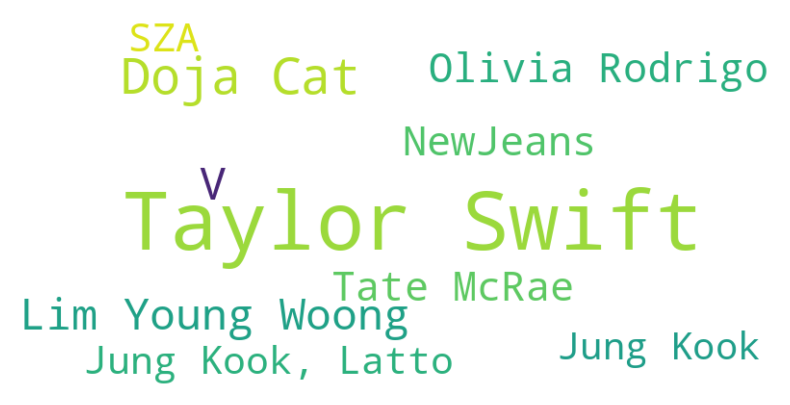

In [8]:
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

# 워드 클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_artists)

# 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

워드 클라우드로 시각화해보았습니다. Taylor Swift의 이름이 다른 아티스트들과 큰 차이를 보입니다. 왜 그런지 해당 결과를 bar plot으로 시각화해보겠습니다.

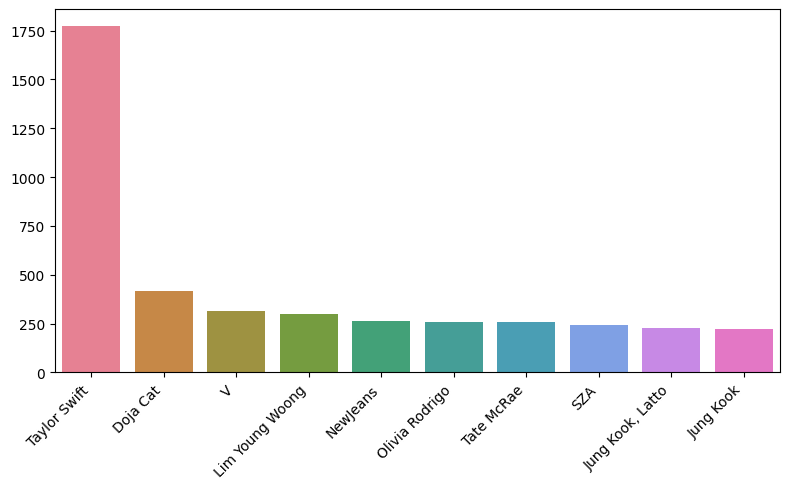

In [9]:
# 시각화 (barplot)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_artists.index, y=top_artists.values, palette='husl')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

위의 결과를 통해 Taylor Swift의 이름이 랭킹에 1600번 이상 등록된 것을 확인할 수 있었습니다.
그렇다면 2023년 11월 10일 하루의 데이터를 확인해 보겠습니다.

In [10]:
# 2023년 11월10일에 해당하는 데이터만 추출
target_date = '2023-11-10'
spotify_date = spotify[spotify['snapshot_date'] == target_date]

# 상위 아티스트 10명 추출
top_artists_date = spotify_date['artists'].value_counts().head(10)

print("상위 아티스트 10명:")
print(top_artists)

상위 아티스트 10명:
Taylor Swift        1772
Doja Cat             418
V                    315
Lim Young Woong      300
NewJeans             262
Olivia Rodrigo       261
Tate McRae           257
SZA                  245
Jung Kook, Latto     229
Jung Kook            221
Name: artists, dtype: int64


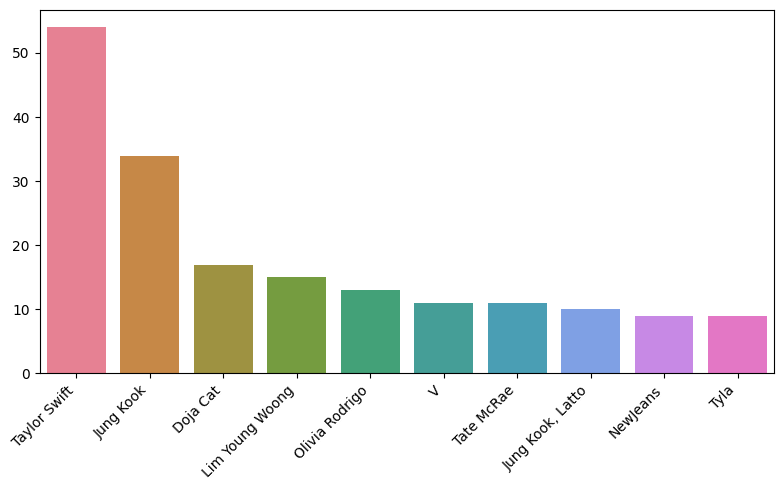

In [11]:
# 시각화 (barplot)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_artists_date.index, y=top_artists_date.values, palette='husl')
plt.xticks(rotation=45, ha='right')

# 그래프 표시
plt.tight_layout()
plt.show()

2023년 11월 10일 하루에도 Taylor Swift의 랭킹 등록 수가 50회 이상으로 가장 높은 것을 확인할 수 있었습니다. 이 횟수들이 어느 나라의 데이터들이 모인 것인지 나라별로 확인해 보겠습니다.

<Figure size 1200x800 with 0 Axes>

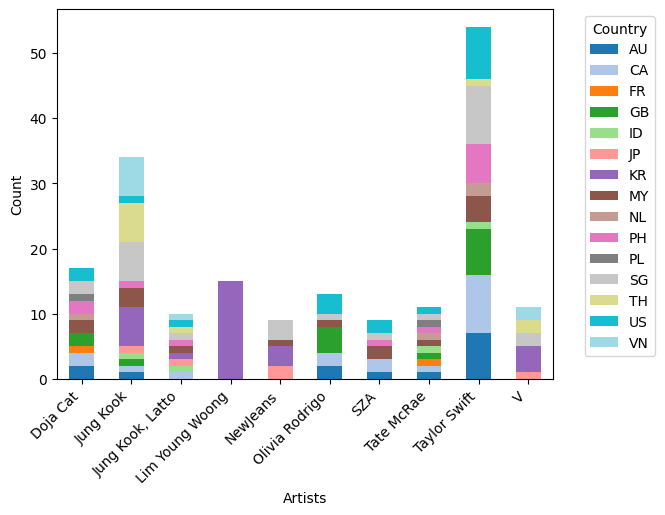

In [12]:
# 각 아티스트의 나라별 분포 데이터 추출
artist_country_distribution = spotify_date[spotify_date['artists'].isin(top_artists.index)][['artists', 'country']]

# 나라별 아티스트 빈도 데이터 재구성
country_artist_counts = artist_country_distribution.groupby(['artists', 'country']).size().unstack().fillna(0)

# 시각화 (barplot stacked)
plt.figure(figsize=(12, 8))
country_artist_counts.plot(kind='bar', stacked=True, colormap='tab20')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.xlabel('Artists')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

가장 많이 등록된 Taylor Swift의 경우에는 미국, 캐나다, 호주, 싱가폴 등에서 많이 스트리밍 되고 있는 것을 확인할 수 있습니다. 반면, 임영웅의 경우엔 한국에서만 스트리밍 되고 있음도 확인할 수 있습니다.

이번에는 plotly의 Scattergeo를 사용하여 1, 2, 3위인 Taylor Swift, 정국, Doja Cat의 국가별 랭킹 분포를 지도에 표시해 보겠습니다.

In [13]:
import plotly.graph_objects as go

# 2023년 11월 10일로 데이터 축소
target_date = '2023-11-10'
spotify_date = spotify[spotify['snapshot_date'] == target_date]

# 나라별 위도 경도
coordinates = {
    'US': {'lat': 37.0902, 'lon': -95.7129},  # United States
    'KR': {'lat': 35.9078, 'lon': 127.7669},  # South Korea
    'JP': {'lat': 36.2048, 'lon': 138.2529},  # Japan
    'GB': {'lat': 55.3781, 'lon': -3.4360},   # United Kingdom
    'FR': {'lat': 46.6035, 'lon': 1.8883},    # France
    'CA': {'lat': 56.1304, 'lon': -106.3468}, # Canada
    'AU': {'lat': -25.2744, 'lon': 133.7751}, # Australia
    'NL': {'lat': 52.3676, 'lon': 4.9041},    # Netherlands
    'ID': {'lat': -0.7893, 'lon': 113.9213},  # Indonesia
    'PL': {'lat': 51.9194, 'lon': 19.1451},   # Poland
    'VN': {'lat': 14.0583, 'lon': 108.2772},  # Vietnam
    'PH': {'lat': 12.8797, 'lon': 121.7740},  # Philippines
    'TH': {'lat': 15.8700, 'lon': 100.9925},  # Thailand
    'MY': {'lat': 4.2105, 'lon': 101.9758},   # Malaysia
    'SG': {'lat': 1.3521, 'lon': 103.8198}    # Singapore
}

# 기존 데이터에 위도 경도 추가
spotify['lat'] = spotify['country'].map(lambda x: coordinates[x]['lat'] if x in coordinates else None)
spotify['lon'] = spotify['country'].map(lambda x: coordinates[x]['lon'] if x in coordinates else None)

# 가수 지정
taylor_swift_data = spotify[spotify['artists'].str.contains('Taylor Swift', na=False)]
jungkook_data = spotify[spotify['artists'].str.contains('Jung Kook', na=False)]
doja_cat_data = spotify[spotify['artists'].str.contains('Doja Cat', na=False)]

# 나라별 인기도
taylor_swift_countries = taylor_swift_data.groupby(['country', 'lat', 'lon']).size().reset_index(name='count')
jungkook_countries = jungkook_data.groupby(['country', 'lat', 'lon']).size().reset_index(name='count')
doja_cat_countries = doja_cat_data.groupby(['country', 'lat', 'lon']).size().reset_index(name='count')

country_codes = {country: i for i, country in enumerate(coordinates.keys())}

taylor_swift_countries['color'] = taylor_swift_countries['country'].map(country_codes)
jungkook_countries['color'] = jungkook_countries['country'].map(country_codes)
doja_cat_countries['color'] = doja_cat_countries['country'].map(country_codes)

layout = go.Layout(
    title='Spotify Artists',
    geo=dict(
        showland=True,
        showcoastlines=True,
    )
)

# 시각화 (Scattergeo)
fig_taylor_swift = go.Figure(layout=layout)
fig_taylor_swift.add_trace(go.Scattergeo(
    lon=taylor_swift_countries['lon'],
    lat=taylor_swift_countries['lat'],
    mode='markers',
    marker=dict(
        size=taylor_swift_countries['count']* 0.2,
        color=taylor_swift_countries['color'],
        colorscale='Viridis',
        opacity=0.7,
        symbol='circle',
        line=dict(width=0.5, color='white')
    ),
    text=taylor_swift_countries['count'],
    name='Taylor Swift'
))
fig_taylor_swift.update_layout(title='Taylor Swift')

fig_jungkook = go.Figure(layout=layout)
fig_jungkook.add_trace(go.Scattergeo(
    lon=jungkook_countries['lon'],
    lat=jungkook_countries['lat'],
    mode='markers',
    marker=dict(
        size=jungkook_countries['count']* 0.4,
        color=jungkook_countries['color'],
        colorscale='Viridis',
        opacity=0.7,
        symbol='circle',
        line=dict(width=0.5, color='white')
    ),
    text=jungkook_countries['count'],
    name='Jung Kook'
))
fig_jungkook.update_layout(title='Jung Kook')

fig_doja_cat = go.Figure(layout=layout)
fig_doja_cat.add_trace(go.Scattergeo(
    lon=doja_cat_countries['lon'],
    lat=doja_cat_countries['lat'],
    mode='markers',
    marker=dict(
        size=doja_cat_countries['count'],
        color=doja_cat_countries['color'],
        colorscale='Viridis',
        opacity=0.7,
        symbol='circle',
        line=dict(width=0.5, color='white')
    ),
    text=doja_cat_countries['count'],
    name='Doja Cat'
))
fig_doja_cat.update_layout(title='Doja Cat')

fig_taylor_swift.show()
fig_jungkook.show()
fig_doja_cat.show()

Taylor Swift는 미국, 캐나다, 호주, 싱가폴과 같은 국가에서 많이 등록된 것을 확인해 볼 수 있습니다.

정국은 한국과 동남아시아에서 많이 등록된 것을 확인해 볼 수 있습니다.

Doja Cat은 Taylor Swift 와 비슷하게 미국, 캐나다, 호주, 싱가폴, 등의 국가에서 많이 등록되어 있습니다.

아티스트 정국을 지정하여 정국의 음원 인기도 비율을 pie chart로 시각화해보겠습니다.

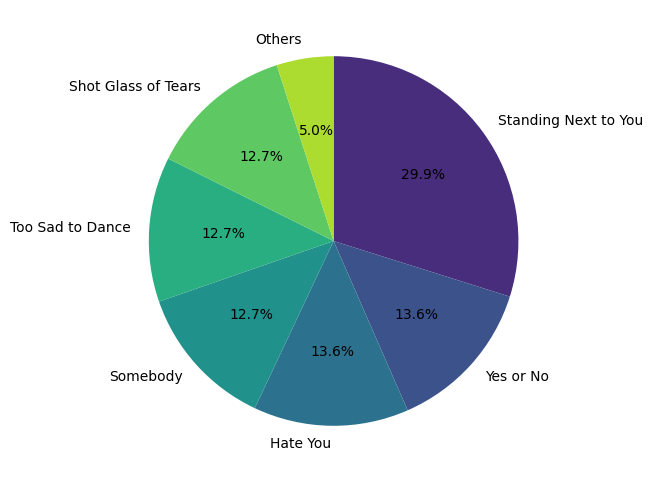

In [14]:
# Jung Kook의 곡들만 추출
jungkook_data = spotify[spotify['artists'] == 'Jung Kook']

# Jung Kook의 각 곡 비율 계산
jungkook_counts = jungkook_data['name'].value_counts()

# 10% 미만인 곡들을 'Others'로 그룹
threshold = 0.1
small_counts = jungkook_counts[jungkook_counts / jungkook_counts.sum() < threshold]
jungkook_counts['Others'] = jungkook_counts[small_counts.index].sum()
jungkook_counts = jungkook_counts.drop(small_counts.index)
colors = sns.color_palette('viridis', len(jungkook_counts))

# 시각화 (pie chart)
plt.figure(figsize=(12, 6))
plt.pie(jungkook_counts, labels=jungkook_counts.index, autopct='%1.1f%%', startangle=90, counterclock=False, colors=colors)
plt.show()

정국의 Standing Next to You가 제일 많은 비율을 차지하는 것을 확인할 수 있습니다. 이어서 정국의 음원들의 데일리 랭킹 변동을 line plot으로 확인해 보겠습니다.

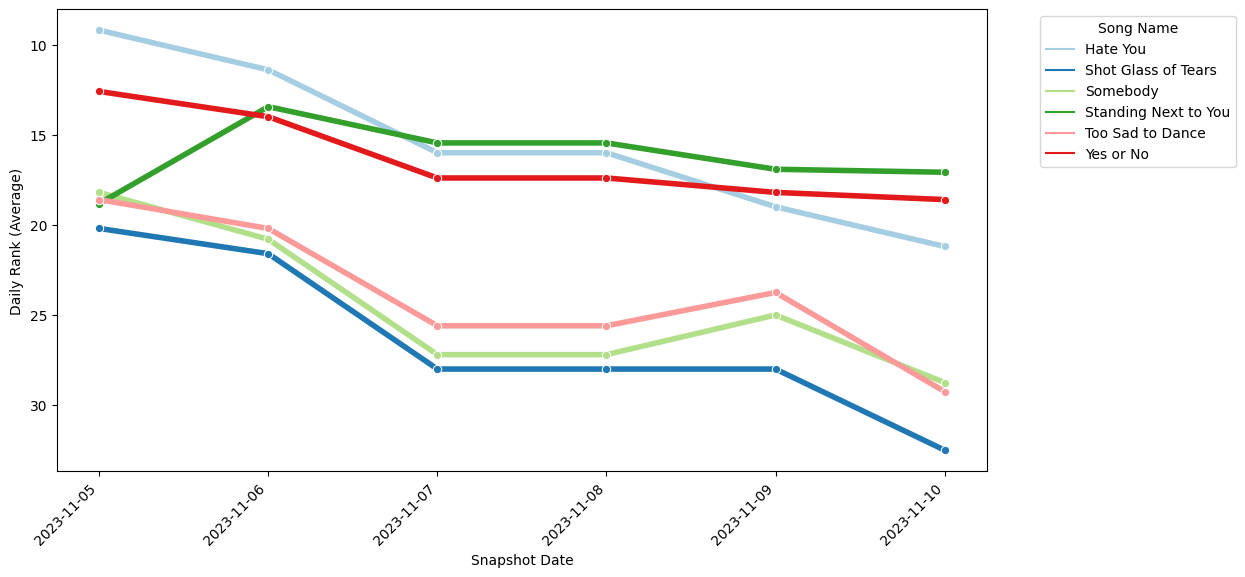

In [15]:
# Jung Kook의 모든 곡 데이터 추출
jungkook_all_songs_data = spotify[spotify['artists'] == 'Jung Kook']

# 2023-11-05 이후의 데이터만 추출
jungkook_data_after_2023_11_05 = jungkook_all_songs_data[jungkook_all_songs_data['snapshot_date'] >= '2023-11-05']

# 날짜별 곡의 평균 daily_rank 계산
average_rank_per_song = jungkook_data_after_2023_11_05.groupby(['snapshot_date', 'name'])['daily_rank'].mean().reset_index()

# 시각화 (lineplot)
plt.figure(figsize=(12, 6))
sns.lineplot(x='snapshot_date', y='daily_rank', data=average_rank_per_song, hue='name', palette='Paired', marker='o', linewidth=4)
plt.xlabel('Snapshot Date')
plt.ylabel('Daily Rank (Average)')
plt.xticks(rotation=45, ha='right')
plt.gca().invert_yaxis()  # y축 뒤집기
plt.legend(title='Song Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

line plot으로 해당 음원들이 등록된 당일에 비해 시간이 지나면서 랭킹이 점점 떨어지는 것을 확인할 수 있습니다.

이번엔 인기 아티스트 10명의 음원들의 특성을 분석해 보겠습니다. 분석할 특성은 danceability 춤에 얼마나 적합한지, energy 어느 정도로 강렬하고 활동적인지, valence 긍정적인 분위기인지(낮으면 부정적)를 기준으로 합니다.

In [16]:
# 가장 많이 언급된 10명의 아티스트 선택
top_artists = spotify['artists'].value_counts().head(10).index

# 각 아티스트의 모든 곡 중에서 겹치지 않게 선택
selected_songs = []
for artist in top_artists:
    artist_songs = spotify[spotify['artists'] == artist]['name'].unique()
    selected_songs.extend(artist_songs)

# 선택된 곡들의 'danceability' 춤에 적합, 'energy' 강렬, 활동적, 'valence' 긍정적인 감정 (낮으면 부정적) 평균 계산
selected_songs_data = spotify[spotify['name'].isin(selected_songs)]
average_features = selected_songs_data.groupby('artists').agg({
    'danceability': 'mean',
    'energy': 'mean',
    'valence': 'mean',
}).reset_index()

print("인기 아티스트 10명의 곡들의 특성 평균:")
print(average_features)

인기 아티스트 10명의 곡들의 특성 평균:
            artists  danceability    energy   valence
0          Doja Cat      0.824103  0.603950  0.599720
1         Jung Kook      0.611516  0.618294  0.550154
2  Jung Kook, Latto      0.798594  0.831716  0.884891
3   Lim Young Woong      0.500460  0.603533  0.428533
4          NewJeans      0.790695  0.768599  0.574927
5    Olivia Rodrigo      0.537502  0.628188  0.468816
6               SZA      0.609306  0.659898  0.407388
7        Tate McRae      0.750000  0.733000  0.844000
8      Taylor Swift      0.625142  0.667525  0.423518
9                 V      0.612352  0.570076  0.423098


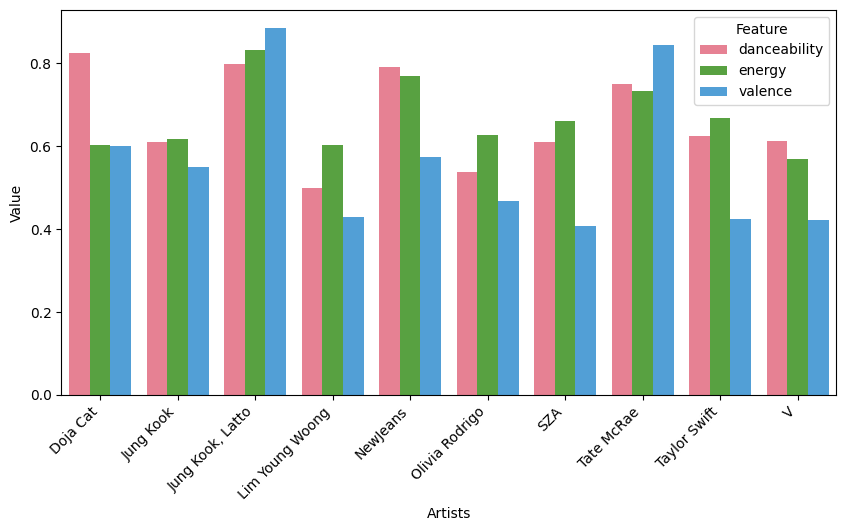

In [17]:
# 시각화 (barplot)
plt.figure(figsize=(10, 5))
sns.barplot(x='artists', y='value', hue='variable', data=pd.melt(average_features, id_vars='artists'), palette='husl')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Value')
plt.xlabel('Artists')
plt.legend(title='Feature')
plt.show()

인기 아티스트 10명의 인기곡들을 총합하고 특성들의 평균을 계산하여 barplot으로 시각화한 결과, 각 아티스트들이 어떤 특성들을 선호하는지 알아볼 수 있었습니다. 이번에는 평균이 아닌 각 아티스트의 제일 인기 있는 음원 하나로 알아보겠습니다.

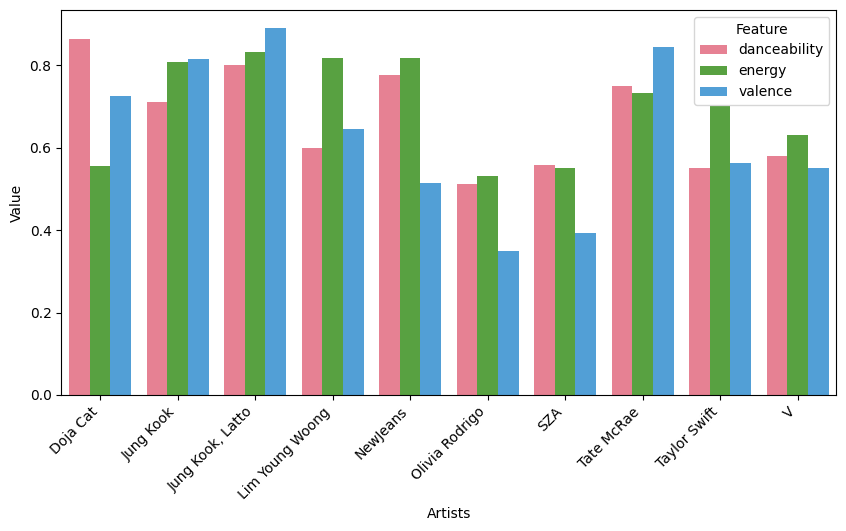

In [18]:
# 가장 많이 언급된 10명의 아티스트 선택
top_artists = spotify['artists'].value_counts().head(10).index

# 각 아티스트의 모든 곡 중에서 popularity가 제일 높은 곡을 겹치지 않게 선택
selected_songs = []
for artist in top_artists:
    # 각 아티스트별로 최고 인기를 가진 곡 선택
    top_song = spotify.loc[spotify[spotify['artists'] == artist]['popularity'].idxmax()]
    selected_songs.append(top_song)

# 선택된 곡들의 'danceability', 'energy', 'valence' barplot으로 시각화
selected_songs_data = pd.DataFrame(selected_songs)

# 아티스트 이름을 알파벳 순으로 정렬
selected_songs_data = selected_songs_data.sort_values(by='artists')

#시각화 (barplot)
plt.figure(figsize=(10, 5))
sns.barplot(x='artists', y='value', hue='variable', data=pd.melt(selected_songs_data[['artists', 'danceability', 'energy', 'valence']], id_vars='artists'), palette='husl', order=selected_songs_data['artists'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Value')
plt.xlabel('Artists')
plt.legend(title='Feature')
plt.show()

한 앨범에서도 곡의 특성이 극과 극인 경우도 있기에 앞선 평균과는 차이가 큰 아티스트들이 있는 것을 확인할 수 있습니다.

앨범의 발매일과 인기도의 상관관계에 대해 알아보겠습니다.

In [19]:
# 앨범 발매일과 인기도 데이터 가져오기
album_data = spotify[['album_release_date', 'popularity']]

# 시간 순서로 정렬
album_data['album_release_date'] = pd.to_datetime(album_data['album_release_date'])
album_data = album_data.sort_values(by='album_release_date')

print("앨범 발매일과 인기도:")
print(album_data[['album_release_date', 'popularity']])

앨범 발매일과 인기도:
      album_release_date  popularity
22141         1942-01-01          69
11203         1942-01-01          73
7562          1942-01-01          73
284           1942-01-01          74
18502         1942-01-01          70
...                  ...         ...
11387         2023-11-03          81
11385         2023-11-03          82
11524         2023-11-03          80
100           2023-11-03          93
908           2023-11-08          31

[18019 rows x 2 columns]


<ipython-input-19-857d218adbd6>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



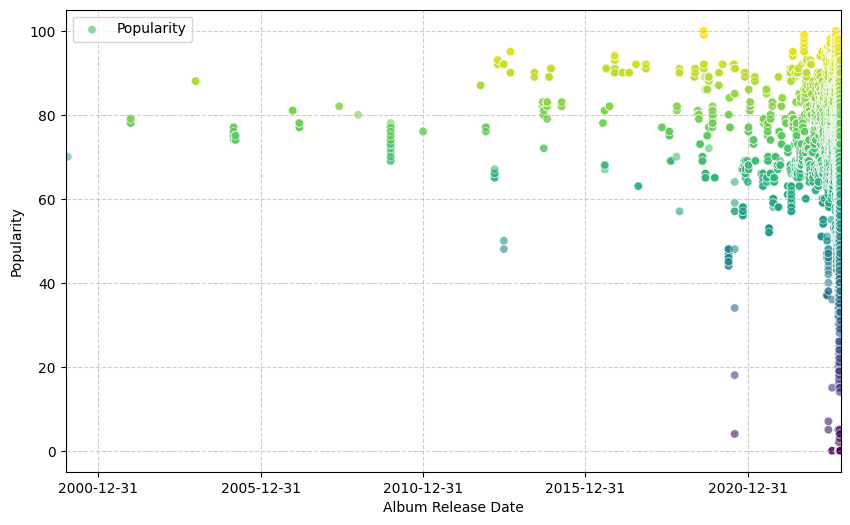

In [20]:
# 시각화 (scatterplot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='album_release_date', y='popularity', data=album_data, alpha=0.6, hue='popularity', palette='viridis', legend='full')

# x 축 범위 설정 (2000년 이후)
plt.xlim(pd.Timestamp('2000-01-01'), album_data['album_release_date'].max())

# x 축 간격 설정 (5년 간격)
plt.xticks(pd.date_range(start='2000-01-01', end=album_data['album_release_date'].max(), freq='5Y'))

# 그래프에 그리드 추가
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylabel('Popularity')
plt.xlabel('Album Release Date')
plt.legend(['Popularity'])
plt.show()

scatterplot으로 시각화한 결과, 오래전 발매된 곡들은 높은 인기도를 유지하고 있고, 최근 발매된 앨범들은 랭킹 50위 안에 들었어도 인기도가 낮은 음원들이 있는 것 확인할 수 있습니다.

In [21]:
# 앨범 발매일이 제일 오래된 곡과 제일 최근 곡 추출
oldest_song = album_data.loc[album_data['album_release_date'].idxmin()]
newest_song = album_data.loc[album_data['album_release_date'].idxmax()]

# 결과 출력 Name = 행번호 + 2
print("앨범 발매일이 가장 오래된 곡:")
print(oldest_song[['album_release_date', 'popularity']])
print("\n앨범 발매일이 가장 최근인 곡:")
print(newest_song[['album_release_date', 'popularity']])

앨범 발매일이 가장 오래된 곡:
album_release_date    1942-01-01 00:00:00
popularity                             69
Name: 22141, dtype: object

앨범 발매일이 가장 최근인 곡:
album_release_date    2023-11-08 00:00:00
popularity                             31
Name: 908, dtype: object


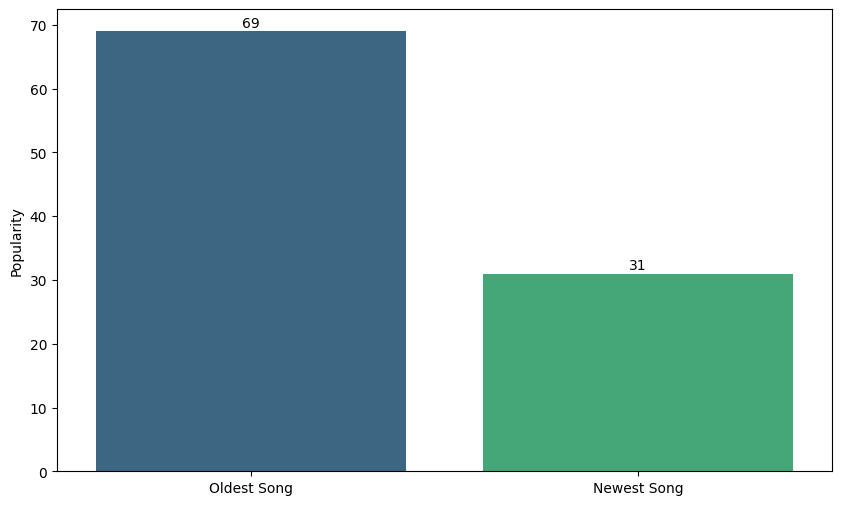

In [22]:
# 시각화 (barplot)
plt.figure(figsize=(10, 6))
sns.barplot(x=['Oldest Song', 'Newest Song'], y=[oldest_song['popularity'], newest_song['popularity']], palette='viridis')

# y 축 레이블 추가
plt.ylabel('Popularity')

for i, value in enumerate([oldest_song['popularity'], newest_song['popularity']]):
    plt.text(i, value + 0.2, str(round(value, 2)), ha='center', va='bottom', fontsize=10)

plt.show()

최근 발매된 곡들이 랭킹 안에 들었음에도 불구하고 인기도가 낮은 이유를 알아본 결과, Spotify에서는 인기도에 얼마나 많이 스트리밍 되는지를 반영하기에 신규 곡들이 오래된 곡들보다 낮을 수 있다는 것을 알게 되었습니다.

국가별 청취 음악의 Explicit 비중을 알아보겠습니다. Explicit은 음원의 선정성, 폭력성, 비속어 묵음처리 여부를 나누는 기준입니다. False는 Explicit 특성이 없음을 의미합니다.

<ipython-input-23-97987c2abf22>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



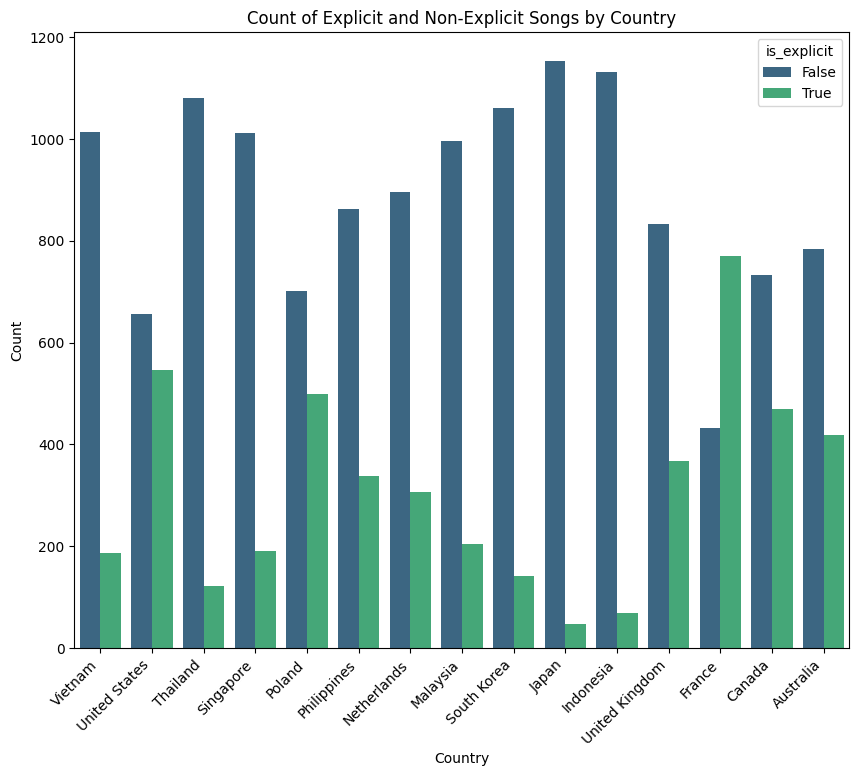

In [23]:
# 나라 코드를 풀네임으로 보기 슆게 매핑
country_mapping = {
    'US': 'United States',
    'KR': 'South Korea',
    'JP': 'Japan',
    'GB': 'United Kingdom',
    'FR': 'France',
    'CA': 'Canada',
    'AU': 'Australia',
    'NL': 'Netherlands',
    'ID': 'Indonesia',
    'PL': 'Poland',
    'VN': 'Vietnam',
    'PH': 'Philippines',
    'TH': 'Thailand',
    'MY': 'Malaysia',
    'SG': 'Singapore'
}

# Explicit 여부에 따른 음악 특성 데이터 추출
explicit_data = spotify[['country', 'is_explicit']]

# 나라 코드를 풀네임으로 변환
explicit_data['country'] = explicit_data['country'].map(country_mapping)

# 시각화 (countplot)
plt.figure(figsize=(10, 8))
sns.countplot(x='country', hue='is_explicit', data=explicit_data, palette='viridis')
plt.title('Count of Explicit and Non-Explicit Songs by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

countplot으로 시각화해본 결과, 한국, 일본과 같은 국가는 Explicit 특성이 있는 음악보다 그렇지 않은 음악을 듣는 비중이 높았습니다. 반면 프랑스는 유일하게 Explicit 특성이 있는 곡을 듣는 비중이 더 높게 나타났습니다.
미리 곡의 인기도를 테스트해보는 예측 모델도 개발해 보았습니다. 해당 모델은 선형 회귀 기법을 사용합니다. 기존 랭킹에 등록된 인기도, 특성들을 사용하여 사용자가 입력한 특성을 토대로 인기도를 예측해 줍니다.

### 데이터 예측, 시뮬레이션

라이브러리 가져오기

In [11]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

 CSV 파일 가져오기

In [12]:
spotify = pd.read_csv("2023_11_10_spotify.csv")

예측 단계

In [13]:
def predict_popularity(danceability, energy, valence):
    # Feature와 Target 설정
    features = spotify[['danceability', 'energy', 'valence']]
    target = spotify['popularity']

    # 데이터 분할
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # 선형 회귀 모델 생성
    model = LinearRegression()

    # 모델 학습
    model.fit(X_train, y_train)

    # 예측
    predicted_popularity = model.predict([[danceability, energy, valence]])

    return predicted_popularity[0]


출력 단계

In [14]:
def map_to_0_1_range(value, min_original, max_original):
    # 입력값을 새로운 범위로 변환
    return (value - min_original) / (max_original - min_original)

def get_valid_input(prompt, min_value, max_value):
    while True:
        try:
            value = float(input(prompt))
            if min_value <= value <= max_value:
                # 입력값을 0.0에서 1.0 사이로 변환
                return map_to_0_1_range(value, min_value, max_value)
            else:
                print(f"입력값은 {min_value}에서 {max_value} 사이어야 합니다. 다시 입력하세요.")
        except ValueError:
            print("올바른 숫자를 입력하세요.")

# 사용자 입력 받기 (유효성 검사 및 변환 포함)
danceability = get_valid_input("춤에 적합하면 10에 가깝게 입력하세요 (0~10): ", 0.0, 10.0)
energy = get_valid_input("강렬하고 활동적이면 10에 가깝게 입력하세요 (0~10): ", 0.0, 10.0)
valence = get_valid_input("긍정적인 분위기의 노래면 10에 가깝게 입력하세요 (0~10): ", 0.0, 10.0)

# 예측 결과 출력
predicted_popularity = predict_popularity(danceability, energy, valence)
print(f"\n예측된 인기도: {predicted_popularity:.2f}")

춤에 적합하면 10에 가깝게 입력하세요 (0~10): 8
강렬하고 활동적이면 10에 가깝게 입력하세요 (0~10): 3
긍정적인 분위기의 노래면 10에 가깝게 입력하세요 (0~10): 5

예측된 인기도: 77.01


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



작곡가의 입장이 되어 각 특성에 점수를 입력해 줬습니다. 어느 정도 춤이 춰지는 곡을 작곡할 계획이기에 1번은 0~10 중에 8을 입력해 줬습니다. 춤을 출 수 있는 곡이어도 꼭 활동적이어야 춤을 출 수 있는 것은 아니기에 2번은 3을 입력해 줬습니다. 마지막으로 곡의 분위기는 긍정적이지도 부정적이지도 않기에 5로 입력해 줬습니다.

실제 인기도를 예측하는 것은 곡의 특성 외에도 가수의 인기도 등의 변수들도 존재하기에 해당 모델은 재미로 가볍게 사용할 수 있습니다.

### 순위에 따른 곡의 특성 추천받기 시뮬레이션

In [18]:
def recommend_attributes_for_rank(spotify, target_rank):
    # 등수에 해당하는 노래 추출
    target_song = spotify[spotify['daily_rank'] == target_rank].iloc[0]

    # 추천할 danceability, energy, valence 값 추출
    recommended_danceability = target_song['danceability'] * 10
    recommended_energy = target_song['energy'] * 10
    recommended_valence = target_song['valence'] * 10

    return recommended_danceability, recommended_energy, recommended_valence

while True:
    # 사용자에게 등수 입력 받기
    target_rank = int(input("달성하고 싶은 등수를 입력하세요 (1~50): "))

    # 등수가 1에서 50 사이인지 확인
    if 1 <= target_rank <= 50:
        break
    else:
        print("올바른 등수를 입력하세요 (1에서 50 사이).")

# 등수에 해당하는 속성값 추천
recommended_danceability, recommended_energy, recommended_valence = recommend_attributes_for_rank(spotify, target_rank)

# 결과 출력
print(f"\n{target_rank}등을 위한 추천 특성값:")
print(f"춤에 적합한 정도: {recommended_danceability:.2f}")
print(f"강렬하고 활동적인 정도: {recommended_energy:.2f}")
print(f"노래 분위기 (높을수록 긍정적): {recommended_valence:.2f}")

달성하고 싶은 등수를 입력하세요 (1~50): 50

50등을 위한 추천 특성값:
춤에 적합한 정도: 3.59
강렬하고 활동적인 정도: 5.43
노래 분위기 (높을수록 긍정적): 4.53


50등을 위한 추천 특성은 1위에서 많이 내려간 것을 확인할 수 있습니다. 해당 시뮬레이션 모델은 예측이 아닌 평균을 이용한 간단한 모델입니다.

## 5. 결론

처음에는 프로젝트만을 해결하기 위한 데이터를 기준으로 찾다 보니 실제 궁금증을 해결하거나 실제로 사용이 가능한 프로젝트를 하기엔 데이터가 부족했습니다. 실제로 사용자들에게 도움이 되는 주제를 생각하고 찾아보니 프로젝트에 더욱 많은 정보를 보여주고 실제 궁금증도 해결할 수 있었습니다. 이 프로젝트를 보완하여 실제 음반 제작사나 작곡가들에게도 도움이 될 것이라고 생각합니다.